## Pandas

### Instructions

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv, groceries.csv

In [1]:
# Imports needed to complete this assignment
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [30]:
#q1 (1)
alumni = pd.read_csv('alumni.csv')
alumni

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"
...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"


### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [31]:
#a) (1)
# Head means displaying the first 5 rows of the dataset
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [32]:
#b) (1)
# Tail means displaying the last 5 rows of the dataset
alumni.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [33]:
#c) (1)
# dtypes means viewing the datatypes of the each of feature
alumni.dtypes

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [34]:
#d) (1)
# info() gives the overview of the all dataset
alumni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [35]:
#e) (1)
# describe () provides the general statistical info about the numeric columns or features
alumni.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [36]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")
 

66000.0

In [37]:
#a) (2)
# Apply the function using the Apply method
alumni['Savings'] = alumni['Savings ($)'].apply(clean_currency)
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0


b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [38]:
#b) (1)
alumni.dtypes.Savings

dtype('float64')

### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [39]:
# a) (1)
alumni["Gender"].value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [42]:
# b) (1)
alumni['Gender'] = alumni['Gender'].apply(lambda x: 'Male' if x == "M" else x)
alumni['Gender'].value_counts() 

# Get the list of variables under the 'Gender' series
# alumni['Gender'].unique()
# alumni.loc[0:87,['Gender']]
# # Use to find the loc position of the rows with 'M' variable under 'Gender' series
# alumni[alumni['Gender'] == 'M']
# # Replace 'M' with 'Male' under Gender series for rows 28,35 and 84
# alumni.loc[[28,35,84],['Gender']] = "Male"
# alumni.reset_index(drop = True, inplace=True)
# alumni.tail()

Male      49
Female    39
Name: Gender, dtype: int64

In [43]:
# c) (1)
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0


e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [44]:
# e) (1)
alumni['Gender'].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [45]:
# a)(1)
median = alumni['Salary'].median()
print (median)

75000.0


In [46]:
# b)(1)
mean = alumni['Salary'].mean()
mean 

84090.90909090909

In [48]:
# c)(1)
Standard_Deviation = alumni['Salary'].std()
Standard_Deviation

21234.1280081736

d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [49]:
# d) (1)
alumni_paid = alumni[alumni['Fee'] > 15000]
alumni_paid  
# We can also use the Query method 

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
18,2006,Male,Married,Standard Diploma,No,140000,20960,"$72,000",72000.0


### Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

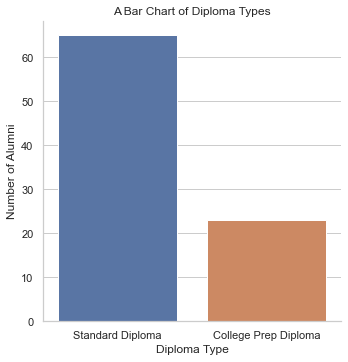

In [50]:
#a) (1)
alumni_per_diploma = alumni['Diploma Type'].value_counts()
alumni_per_diploma = pd.DataFrame(alumni_per_diploma)
alumni_per_diploma.reset_index(drop=False, inplace=True)
alumni_per_diploma.rename(columns={"index":"Diploma","Diploma Type":"Count"},inplace=True)
alumni_per_diploma
# Set the theme style to 'whitegrid'
sns.set_theme(style='whitegrid')
# Plot the extracted dataset 'alumni_per_diploma'
sns.catplot(x= 'Diploma',
            y = 'Count',
            data = alumni_per_diploma,
            kind = 'bar',
            ci = 'None'
)
plt.xlabel('Diploma Type')
plt.ylabel('Number of Alumni')
plt.title('A Bar Chart of Diploma Types')
plt.show()

# Alternative quick method for ploting
# alumni['Diploma Type'].value_counts().plot(kind = 'bar')


b) Now create a box plot comparison between 'Savings' and 'Salary' columns

<AxesSubplot:title={'center':'Salary'}, xlabel='Savings'>

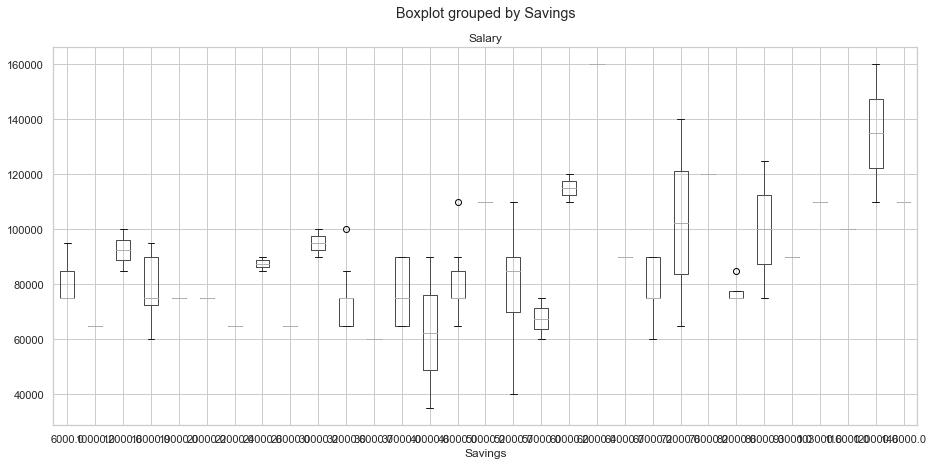

In [51]:
#b) (1)
alumni.boxplot('Salary', 'Savings', figsize = (15, 7))

# plt.figure(figsize= (30,15))
# sns.boxplot(x = 'Savings',
#             y = 'Salary',
#             data = df_copy,
#             orient = 'v',
#             palette="Set2",
#             width = 0.5,
#             # Use 'Showmeans' to display markers for means
#             showmeans = True,
#             # Format the display markers for the means
#             meanprops = {"marker" :'o', 'markerfacecolor' : 'white', 'markersize' : "5", "markeredgecolor" : 'white'}
# )
# plt.title('A Boxplot of Savings vs Salary', pad = 40)
# plt.show()

c) Generate a histogram with the 'Salary' column and use 12 bins.

<AxesSubplot:ylabel='Frequency'>

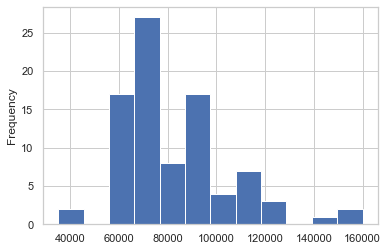

In [52]:
#c) (1)
alumni['Salary'].plot.hist(bins = 12)

d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

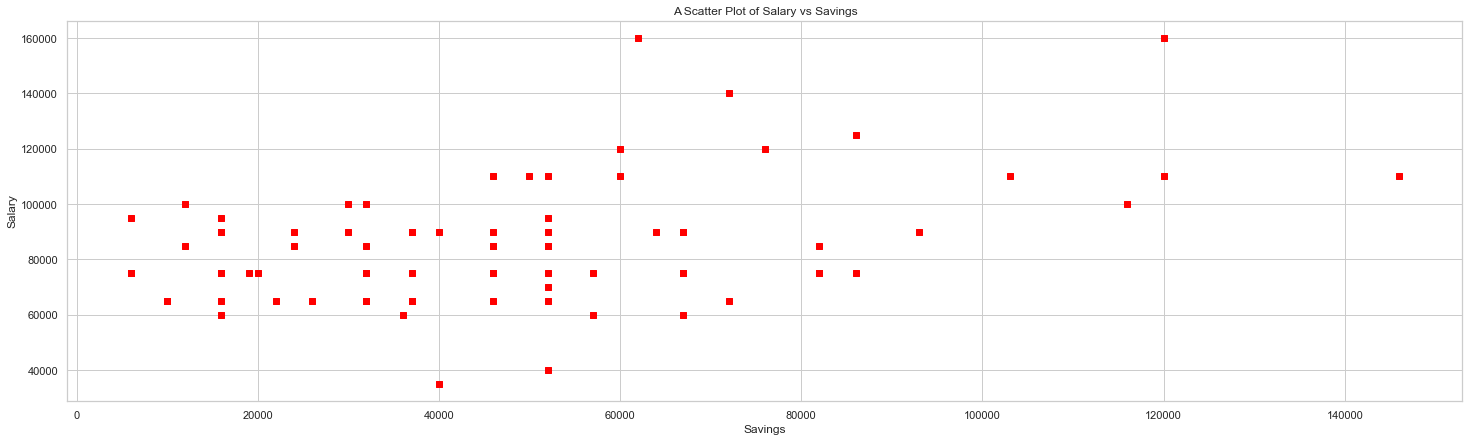

In [53]:
#d) (1)
x = alumni['Savings']
y = alumni['Salary']
fig1, ax1 = plt.subplots(figsize=(25,7))
ax1.scatter(x,y, c='red',marker='s')
ax1.set_title("A Scatter Plot of Salary vs Savings")
ax1.set_ylabel('Salary')
ax1.set_xlabel('Savings')
plt.show()

# Alternative quick method 
# alumni.plot.scatter('Salary', 'Savings', figsize = (10, 7))

### Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [54]:
# Q7 (2)
pd.crosstab(index = alumni['Marital Status'],columns = ['Defaulted'])


col_0,Defaulted
Marital Status,
Divorced,19
Married,35
Single,34
